In [1]:
# initialize stuff
import sys
import logging
import importlib

import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm import tqdm
from scipy.optimize import curve_fit

# import theory stuff

HOME_DIR = "/Users/oliver/Documents/p5control-bluefors-evaluation"
sys.path.append(HOME_DIR)

import superconductivity.api as sc

from superconductivity.style.cpd4 import cmap, colors

import numpy as np

from matplotlib.markers import MarkerStyle
from matplotlib.lines import Line2D

import superconductivity.api as sc

from superconductivity.api import G_0_muS
from superconductivity.api import NDArray64

from IPython import get_ipython

_ip = get_ipython()
if _ip is not None:
    _ip.run_line_magic("matplotlib", "inline")
    _ip.run_line_magic("reload_ext", "autoreload")
    _ip.run_line_magic("autoreload", "2")

    _ip.run_line_magic(
        "config",
        "InlineBackend.print_figure_kwargs = {'bbox_inches': None, 'pad_inches': 0.0}",
    )
    _ip.run_line_magic("config", 'InlineBackend.figure_format = "retina"')  # or "png"
    _ip.run_line_magic(
        "config", "InlineBackend.rc = {'figure.dpi': 300}"
    )  # choose a value you like

In [2]:
Delta_meV = 0.19345
G_N = 0.18877
nu_GHz = 13.6
eta = 0.002175
title_html = "TB irradiated with <i>ν = </i>13.6 GHz"
title = "TB, nu=13.6GHz"
dataset = Path("TB", "nu=13.6GHz")
expdata = "amplitude at 13.6GHz"

# Delta_meV = 0.1895
# nu_GHz = 15.0
# eta = 0.0035
# dataset = "2.09G0/nu=15GHz"
# title = "Amplitude Study (15GHz, Antenna)"

In [3]:
from utilities.ivplot import IVPlot

importlib.reload(sys.modules["utilities.ivevaluation"])
eva = IVPlot()
eva.sub_folder = ""
eva.title = expdata
eva.loadData()

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(base) amplitude at 13.6GHz
(base) loadData()


In [4]:
V_bias_mV = eva.mapped["voltage_axis"] * 1e3
I_bias_nA = eva.mapped["current_axis"] * 1e9
V_data_mV = eva.up_sweep["voltage"] * 1e3
I_data_nA = eva.up_sweep["current"] * 1e9
dIdV_G0 = eva.up_sweep["differential_conductance"]
dVdI_R0 = eva.up_sweep["differential_resistance"]

A_out_mV = eva.mapped["y_axis"] * 1e3
A_bias_mV = A_out_mV * eta
A_bias = A_bias_mV / (sc.h_e_pVs * nu_GHz)

T_exp_K = eva.up_sweep["temperature"]

V_bias = V_bias_mV / Delta_meV
V_data = V_data_mV / Delta_meV
I_bias = I_bias_nA / (Delta_meV * sc.G_0_muS)
I_data = I_data_nA / (Delta_meV * sc.G_0_muS)
dIdV_GN = dIdV_G0 / G_N
dVdI_RN = dVdI_R0 * G_N

In [5]:
from superconductivity.visualization.visualizer import IVData

importlib.reload(sys.modules["superconductivity.visualization.visualizer"])

ivdata = IVData(
    V_bias_exp_mV=V_bias_mV,
    I_bias_exp_nA=I_bias_nA,
    V_data_exp_mV=V_data_mV,
    I_data_exp_nA=I_data_nA,
    y_exp=A_out_mV,
    T_exp_K=T_exp_K,
    G_N=G_N,
    Delta_meV=Delta_meV,
    y_coupling=eta / (sc.h_e_pVs * nu_GHz),
)

In [6]:
# html_labels
V_mV_label = "<i>V</i> (mV)"
I_nA_label = "<i>I</i> (nA)"
A_mV_label = "<i>A</i> (mV)"
V_label = "<i>eV/</i>Δ<sub>0</sub>"
I_label = "<i>eI/G<sub>0</sub></i>Δ<sub>0</sub>"
A_label = "<i>eA/hν</i>"
dIdV_G0_label = "d<i>I</i>/d<i>V</i> (G<sub>0</sub>)"
dVdI_R0_label = "d<i>V</i>/d<i>I</i> (R<sub>0</sub>)"
dIdV_label = "d<i>I</i>/d<i>V</i> (G<sub>N</sub>)"
dVdI_label = "d<i>V</i>/d<i>I</i> (R<sub>N</sub>)"

T_K_label = "<i>T</i> (K)"

In [7]:
from superconductivity.visualization.plotly import (
    get_surface,
    get_plain,
    get_slider,
    get_heatmap,
    get_all,
)

importlib.reload(sys.modules["superconductivity.visualization.plotly"])


figs = get_all(
    x=V_bias_mV,
    y=A_bias_mV,
    z=I_data_nA,
    name="IV_exp",
    dataset=dataset,
    xlabel=V_mV_label,
    ylabel=A_mV_label,
    zlabel=I_nA_label,
)

figs = get_all(
    x=V_bias_mV,
    y=A_bias_mV,
    z=dIdV_G0,
    name="dIdV_exp",
    dataset=dataset,
    xlabel=V_mV_label,
    ylabel=A_mV_label,
    zlabel=dIdV_G0_label,
)

figs = get_all(
    x=I_bias_nA,
    y=A_bias_mV,
    z=V_data_mV,
    name="VI_exp",
    dataset=dataset,
    xlabel=V_mV_label,
    ylabel=A_mV_label,
    zlabel=I_nA_label,
)

figs = get_all(
    x=I_bias_nA,
    y=A_bias_mV,
    z=dVdI_R0,
    name="dVdI_exp",
    dataset=dataset,
    xlabel=V_mV_label,
    ylabel=A_mV_label,
    zlabel=dVdI_R0_label,
)

figs = get_all(
    x=V_bias,
    y=A_bias,
    z=I_data,
    name="IV_theo",
    dataset=dataset,
    xlabel=V_label,
    ylabel=A_label,
    zlabel=I_label,
)

figs = get_all(
    x=V_bias,
    y=A_bias,
    z=dIdV_GN,
    name="dIdV_theo",
    dataset=dataset,
    xlabel=V_label,
    ylabel=A_label,
    zlabel=dIdV_label,
)

figs = get_all(
    x=I_bias,
    y=A_bias,
    z=V_data,
    name="VI_theo",
    dataset=dataset,
    xlabel=V_label,
    ylabel=A_label,
    zlabel=I_label,
)

figs = get_all(
    x=I_bias,
    y=A_bias,
    z=dVdI_RN,
    name="dVdI_theo",
    dataset=dataset,
    xlabel=V_label,
    ylabel=A_label,
    zlabel=dVdI_label,
)

In [8]:
from superconductivity.visualization.html import build_html

importlib.reload(sys.modules["superconductivity.visualization.html"])

build_html(
    dataset=dataset,
    title=title,
    title_html=title_html,
)

In [9]:
from superconductivity.visualization.stl import write_3D_print

importlib.reload(sys.modules["superconductivity.visualization.stl"])

write_3D_print(
    z=dIdV_GN,
    zlim=(0, 5),
    title="dIdV_theo",
    dataset=dataset,
)

In [10]:
from superconductivity.visualization.svg import save_axis

importlib.reload(sys.modules["superconductivity.visualization.svg"])

axis = save_axis(
    values=np.linspace(0, 12, 6),
    label=r"$\mathrm{d}I/\mathrm{d}V\,(G_{0})$",
    title="x dIdV_exp",
    dataset=dataset,
    tickformat=".2g",
)

axis = save_axis(
    values=np.linspace(-2, 2, 6),
    label=r"$\mathrm{d}I/\mathrm{d}V\,(G_{0})$",
    title="z dIdV_exp",
    dataset=dataset,
    tickformat=".2g",
    vertical=True,
)

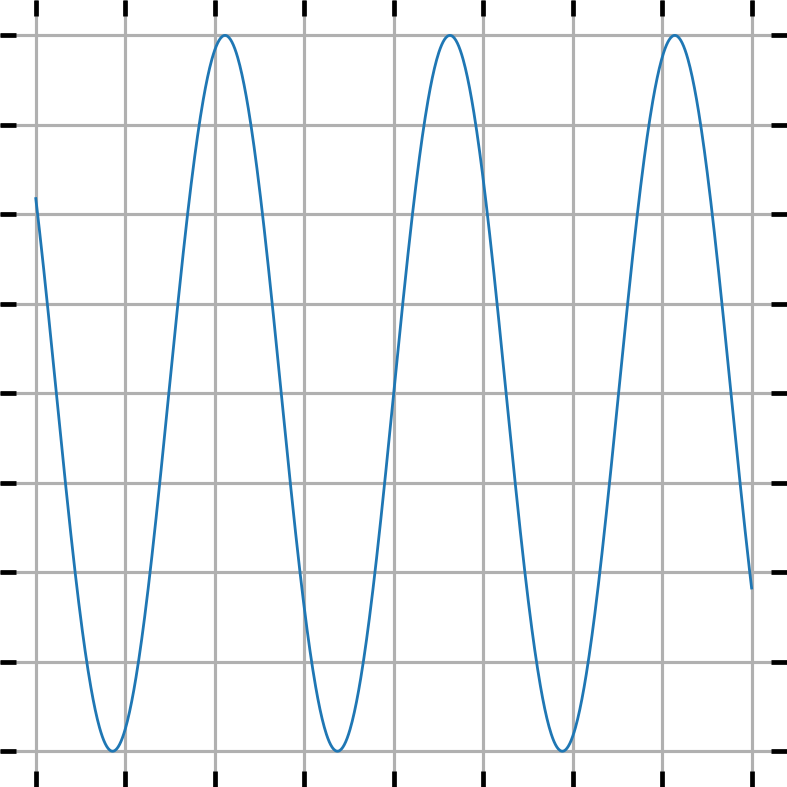

In [18]:
from superconductivity.visualization.svg import save_axis, save_data

importlib.reload(sys.modules["superconductivity.visualization.svg"])

fig, ax = plt.subplots()

x = np.linspace(-10, 10, 1001)
y = np.sin(x)

ax.plot(x, y)
ax.grid()

save_data(
    ax=ax,
    dataset=dataset,
    title="test",
)